# **UTS**

Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
- metode KNN
- metode pohon keputusan (Desision tree)

## K-NN

In [1]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Eksplorasi Data

In [2]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
data.shape

(116, 10)

Pindahkan dataset menjadi input (X) dan target (Y)

In [4]:
#Membuat dataframe dengan semua training data kecuali kolom target
X = data.drop(columns=["Classification"])
#mengecek apakah variabel target sudah dihapus
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [5]:
Y = data["Classification"].values
Y[0:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

Memisahkan dataset menjadi train dan test data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

Scaling Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Membuat dan Testing Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# Membuat KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#Menampilkan 5 model prediksi pertama pada data test
knn.predict(X_test_scaled)[0:5]

array([2, 1, 2, 1, 1])

In [10]:
#check accuracy of our model on the test data
knn.score(X_test_scaled, Y_test)

0.625

K-Fold Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np
#Membuat model KNN baru
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model dengan cv 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print setiap cv score (akurasi) dan rata - ratanya
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


Hypertuning model parameters menggunakan GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
#Membuat model KNN baru
knn2 = KNeighborsClassifier()
#Membuat dictionary dari semua value yang ingin dites untuk n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#Menggunakan gridsearch untuk mengetes semua value kepada n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model ke data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
#Cek top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [14]:
#Cek skor rata - rata untuk top performing value dari n_neighbors
knn_gscv.best_score_

0.5688405797101449

# Desision Tree

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

Desision Tree Classifier

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_scaled, Y_train)

Grafik Desision Tree

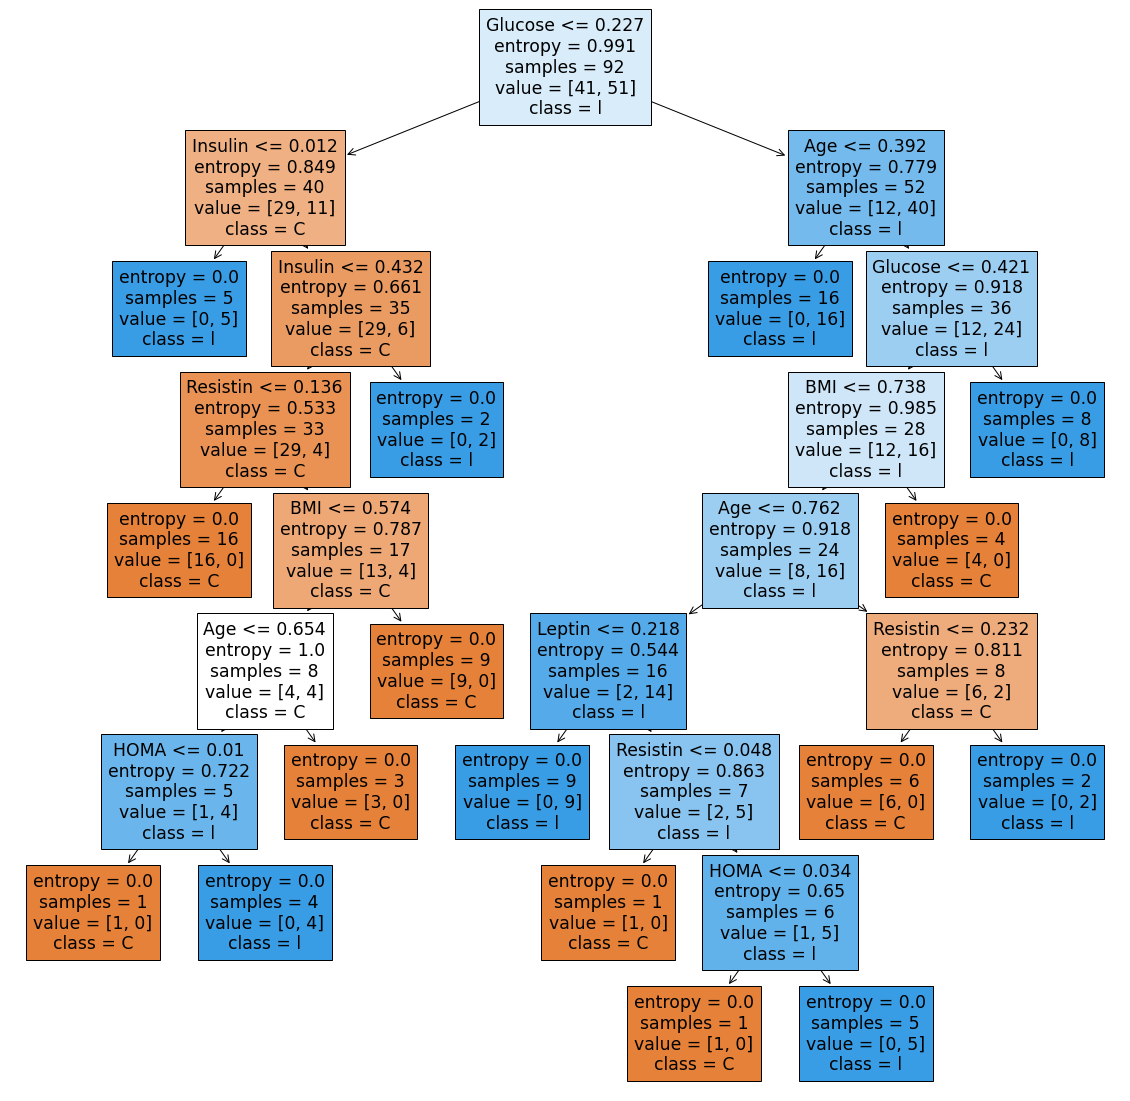

In [17]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)

Menampilkan nilai Data Train dan Data Uji

In [18]:
print("Data Train : ", clf.score(X_train_scaled, Y_train))
print("Data Test : ", clf.score(X_test_scaled, Y_test))

Data Train :  1.0
Data Test :  0.6666666666666666
